In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
from itertools import chain
import glob
import seaborn as sns
import matplotlib.font_manager as font_manager
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from collections import Counter
from pandas import read_csv
from datetime import datetime
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()

In [2]:
sns.set_theme()
mpl.matplotlib_fname()
font_dirs = ['D:\\Software\\Anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf' ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
mpl.font_manager._rebuild()
result = font_manager.findfont("Rounded Mplus 1c")
print(result)
mpl.rc('font', family='Rounded Mplus 1c')

D:\Software\Anaconda\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\MPLUSRounded1c-Regular.ttf


In [3]:
def extract_engine_data (description, list_em):
    engine_model = []
    for e in list_em:
        em_reg = re.findall(r'\b{}-\w+-?\w*\b'.format(e), description)
        if len(em_reg) != 0 :
          em_reg = map(lambda x : x.split('-')[0],em_reg)
#           em_reg = list(set(em_reg)) 
          engine_model.append(em_reg)
    if len(engine_model) != 0:
      return list(chain(*engine_model))
    else: 
      return 0

In [4]:
# Load list all engine model in GTO
# df_merged = read_csv('list_all_em_GTO.csv',parse_dates=['Register Date'])
df_merged = read_csv('list_all_em_GTO.csv')
df_merged['Register Date'] = pd.to_datetime(df_merged['Register Date'],format='%Y-%m-%d')
df_merged.drop('Unnamed: 0',axis=1,inplace=True)
df_merged.head()

,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,Shipper Address,Consignee,Consignee Address,Quantity,Unit of Measure,Incoterms,Gross Weight in KG,Net Weight in KG,Cargo Value USD
0,2011-01-29,8407349908,СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-261 В РАЗОБРАННО...,TOYOTA TSUSHO CORPORATION,ОТСУТСТВУЕТ,КОТКА,"JP, JPN, Japan","JP, JPN, Japan",TOYOTA TSUSHO CORPORATION,"450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME",ООО ТЕХНОСЕРВИСПРОМ,"603104, НИЖЕГОРОДСКАЯ ОБЛ, Н.НОВГОРОД, НАРТОВА...",15,ШТ,CIF,3604.0,3017.0,73063.36
1,2011-01-29,8407349908,СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-A343E-111 В РАЗО...,TOYOTA TSUSHO CORPORATION,ОТСУТСТВУЕТ,КОТКА,"JP, JPN, Japan","JP, JPN, Japan",TOYOTA TSUSHO CORPORATION,"450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME",ООО ТЕХНОСЕРВИСПРОМ,"603104, НИЖЕГОРОДСКАЯ ОБЛ, Н.НОВГОРОД, НАРТОВА...",5,ШТ,CIF,1765.0,1465.0,37014.64
2,2011-01-17,8407343009,"ДВИГАТЕЛЬ ЗИЛ ,Б/У,БЕНЗИНОВЫЙ,ОБЪЕМ 6000СМ.КУБ...",АМО ЗИЛ,ЗИЛ,ЕКАТЕРИНБУРГ,"RU, RUS, Russia","UA, UKR, Ukraine",ООО ПЕТРУС,"Г.ДРОГОБЫЧ УЛ.ГАЙДАМАЦКАЯ, 7/1",ЗАО АВТОМОБИЛИ И МОТОРЫ УРАЛА,"624130, СВЕРДЛОВСКАЯ ОБЛ., Г.НОВОУРАЛЬСК, УЛ.А...",30,ШТ,CPT,14400.0,14400.0,27000.00
3,2011-01-17,8407343009,"ДВИГАТЕЛЬ ЗИЛ ,Б/У,НЕКОМПЛЕКТНЫЙ,БЕНЗИНОВЫЙ,ОБ...",АМО ЗИЛ,ЗИЛ,ЕКАТЕРИНБУРГ,"RU, RUS, Russia","UA, UKR, Ukraine",ООО ПЕТРУС,"Г.ДРОГОБЫЧ УЛ.ГАЙДАМАЦКАЯ, 7/1",ЗАО АВТОМОБИЛИ И МОТОРЫ УРАЛА,"624130, СВЕРДЛОВСКАЯ ОБЛ., Г.НОВОУРАЛЬСК, УЛ.А...",15,ШТ,CPT,3000.0,3000.0,6894.50
4,2011-01-20,8407343009,ДВИГАТЕЛИ БЕНЗИНОВЫЕ В СБОРЕ С КОРОБКОЙ ПЕРЕДА...,MERCEDES - BENZ,MERCEDES - BENZ,ТОЯМА НЬЮ ПОРТ,"JP, JPN, Japan","JP, JPN, Japan","METAL AUTO HOKURIKU CO., LTD","ISHIKAWA KEN KOMATSU SHI SHIRAE MACHI, RO 62",ИП КОЧЕТКОВ ВЯЧЕСЛАВ ВИКТОРОВИЧ,"664019, , Г ИРКУТСК, ПЕР. МИНУСИНСКИЙ Д 10",38,ШТ,FOB,6460.0,6460.0,6536.45


In [7]:
df_merged.isnull().sum()

Register Date          0
HS Code                0
Product Description    0
Producer               0
Brand                  0
Place of Receipt       0
Country of Origin      0
Country of Sales       0
Shipper                0
Shipper Address        0
Consignee              0
Consignee Address      0
Quantity               0
Unit of Measure        0
Incoterms              0
Gross Weight in KG     0
Net Weight in KG       0
Cargo Value USD        0
dtype: int64

In [7]:
for col in list(df_merged.columns):
 (df_merged[col].dtype ==  'object') and (df_merged[col].fillna(value='unknown',inplace = True)) or (df_merged[col].fillna(value=0, inplace = True))

In [6]:
df_merged['Register Date'].dtypes

dtype('<M8[ns]')

In [11]:
df_merged.isnull().sum()

Register Date          0
HS Code                0
Product Description    0
Producer               0
Brand                  0
Place of Receipt       0
Country of Origin      0
Country of Sales       0
Shipper                0
Shipper Address        0
Consignee              0
Consignee Address      0
Quantity               0
Unit of Measure        0
Incoterms              0
Gross Weight in KG     0
Net Weight in KG       0
Cargo Value USD        0
dtype: int64

In [1]:
# Load list engine model
df_list_engine = pd.read_excel('Engine Model _1025.xlsx')
df_list_engine.head()

NameError: name 'pd' is not defined

In [9]:
# Load list engine TOYOTA
df_brand_toyota =  df_list_engine[df_list_engine['メーカー']  == 'TOYOTA']
list_toyota = list(df_brand_toyota['型式'].unique())
list_toyota  = list(map(lambda x: x.split('-')[0],list_toyota))
list_toyota  = list(set(list_toyota))

In [10]:
df_brand_mazda =  df_list_engine[df_list_engine['メーカー']  == 'MAZDA']
list_mazda = list(df_brand_mazda['型式'].unique())
list_mazda  = list(map(lambda x: x.split('-')[0],list_mazda))
list_mazda  = list(set(list_mazda))

In [11]:
df_brand_mitsubishi =  df_list_engine[df_list_engine['メーカー']  == 'MITSUBISHI']
list_mitsubishi = list(df_brand_mitsubishi['型式'].unique())
list_mitsubishi  = list(map(lambda x: x.split('-')[0],list_mitsubishi))
list_mitsubishi  = list(set(list_mitsubishi))

In [12]:
df_brand_honda =  df_list_engine[df_list_engine['メーカー']  == 'HONDA']
list_honda = list(df_brand_honda['型式'].unique())
list_honda  = list(map(lambda x: x.split('-')[0],list_honda))
list_honda  = list(set(list_honda))

In [13]:
df_brand_nissan =  df_list_engine[df_list_engine['メーカー']  == 'NISSAN']
list_nissan = list(df_brand_nissan['型式'].unique())
list_nissan  = list(map(lambda x: x.split('-')[0],list_nissan))
list_nissan  = list(set(list_nissan))

In [14]:
df_brand_subaru =  df_list_engine[df_list_engine['メーカー']  == 'SUBARU']
list_subaru = list(df_brand_subaru['型式'].unique())
list_subaru  = list(map(lambda x: x.split('-')[0],list_subaru))
list_subaru  = list(set(list_subaru))

# Extract list engine of each brand

In [15]:
df_toyota_GTO = df_merged[df_merged.Producer.str.contains('TOYOTA')]
df_toyota_GTO['extracted_engine']  = df_toyota_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_toyota))
df_toyota_GTO['brand'] = 'TOYOTA'
df_toyota_GTO_extracted_em = df_toyota_GTO[df_toyota_GTO['extracted_engine'] !=0]

<ipython-input-15-2c10ef0cfc14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_toyota_GTO['extracted_engine']  = df_toyota_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_toyota))
<ipython-input-15-2c10ef0cfc14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_toyota_GTO['brand'] = 'TOYOTA'


In [16]:
df_mazda_GTO = df_merged[df_merged.Producer.str.contains('MAZDA')]
df_mazda_GTO['brand'] = 'MAZDA'
df_mazda_GTO['extracted_engine']  = df_mazda_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_mazda))
df_mazda_GTO_extracted_em = df_mazda_GTO[df_mazda_GTO['extracted_engine'] !=0]

<ipython-input-16-55b0c9e7ffc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mazda_GTO['brand'] = 'MAZDA'
<ipython-input-16-55b0c9e7ffc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mazda_GTO['extracted_engine']  = df_mazda_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_mazda))


In [17]:
df_mitsubishi_GTO = df_merged[df_merged.Producer.str.contains('MITSUBISHI')]
df_mitsubishi_GTO['brand'] = 'MITSUBISHI'
df_mitsubishi_GTO['extracted_engine']  = df_mitsubishi_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_mitsubishi))
df_mitsubishi_GTO_extracted_em = df_mitsubishi_GTO[df_mitsubishi_GTO['extracted_engine'] !=0]

<ipython-input-17-a3695c5d34da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mitsubishi_GTO['brand'] = 'MITSUBISHI'
<ipython-input-17-a3695c5d34da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mitsubishi_GTO['extracted_engine']  = df_mitsubishi_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_mitsubishi))


In [18]:
df_honda_GTO = df_merged[df_merged.Producer.str.contains('HONDA')]
df_honda_GTO['brand'] = 'HONDA'
df_honda_GTO['extracted_engine']  = df_honda_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_honda))
df_honda_GTO_extracted_em = df_honda_GTO[df_honda_GTO['extracted_engine'] !=0]

<ipython-input-18-0c8c0f52b4a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_honda_GTO['brand'] = 'HONDA'
<ipython-input-18-0c8c0f52b4a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_honda_GTO['extracted_engine']  = df_honda_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_honda))


In [19]:
df_nissan_GTO = df_merged[df_merged.Producer.str.contains('NISSAN')]
df_nissan_GTO['brand'] = 'NISSAN'
df_nissan_GTO['extracted_engine']  = df_nissan_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_nissan))
df_nissan_GTO_extracted_em = df_nissan_GTO[df_nissan_GTO['extracted_engine'] !=0]

<ipython-input-19-edd9724bdd48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nissan_GTO['brand'] = 'NISSAN'
<ipython-input-19-edd9724bdd48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nissan_GTO['extracted_engine']  = df_nissan_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_nissan))


In [20]:
df_subaru_GTO = df_merged[df_merged.Producer.str.contains('SUBARU')]
df_subaru_GTO['brand'] = 'SUBARU'
df_subaru_GTO['extracted_engine']  = df_subaru_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_subaru))
df_subaru_GTO_extracted_em = df_subaru_GTO[df_subaru_GTO['extracted_engine'] != 0]

<ipython-input-20-72adf53e9231>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subaru_GTO['brand'] = 'SUBARU'
<ipython-input-20-72adf53e9231>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subaru_GTO['extracted_engine']  = df_subaru_GTO['Product Description'].map(lambda x : extract_engine_data (x, list_subaru))


In [21]:
list_brand  = [df_toyota_GTO_extracted_em,df_mazda_GTO_extracted_em,df_honda_GTO_extracted_em,df_nissan_GTO_extracted_em,df_subaru_GTO_extracted_em]
df_all = pd.concat(list_brand)

In [22]:
df_all['extracted_engine'] = df_all.extracted_engine.map(tuple)
df_all.drop_duplicates()

,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,Shipper Address,Consignee,Consignee Address,Quantity,Unit of Measure,Incoterms,Gross Weight in KG,Net Weight in KG,Cargo Value USD,extracted_engine,brand
0,2011-01-29,8407349908,СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-261 В РАЗОБРАННО...,TOYOTA TSUSHO CORPORATION,ОТСУТСТВУЕТ,КОТКА,"JP, JPN, Japan","JP, JPN, Japan",TOYOTA TSUSHO CORPORATION,"450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME",ООО ТЕХНОСЕРВИСПРОМ,"603104, НИЖЕГОРОДСКАЯ ОБЛ, Н.НОВГОРОД, НАРТОВА...",15,ШТ,CIF,3604.0,3017.0,73063.36,"(2TR, 2TR)",TOYOTA
1,2011-01-29,8407349908,СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-A343E-111 В РАЗО...,TOYOTA TSUSHO CORPORATION,ОТСУТСТВУЕТ,КОТКА,"JP, JPN, Japan","JP, JPN, Japan",TOYOTA TSUSHO CORPORATION,"450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME",ООО ТЕХНОСЕРВИСПРОМ,"603104, НИЖЕГОРОДСКАЯ ОБЛ, Н.НОВГОРОД, НАРТОВА...",5,ШТ,CIF,1765.0,1465.0,37014.64,"(2TR, 2TR)",TOYOTA
6,2011-01-06,8407343009,"ДВС БЕНЗИН А/М Б/У В СБОРЕ С АКП: TOYOTA,1JZ-0...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","МИХАИЛ КАМПАНИ КО.,ЛТД","910-0049 ФУКУИ-КЕН ФУКУИ-ШИ ФУКАДАНИ-ЧО, 1-7-3",НИКА ВЭД ООО,"690002, ПРИМОРСКИЙ КРАЙ, Г.ВЛАДИВОСТОК, НЕКРАС...",1,ШТ,CFR,150.0,150.0,120.00,"(1JZ,)",TOYOTA
10,2011-01-13,8407343009,"ДВС БЕНЗИН А/М Б/У В СБОРЕ С АКП: TOYOTA,5K-12...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","МИХАИЛ КАМПАНИ КО.,ЛТД","910-0049 ФУКУИ-КЕН ФУКУИ-ШИ ФУКАДАНИ-ЧО, 1-7-3",НИКА ВЭД ООО,"690002, ПРИМОРСКИЙ КРАЙ, Г.ВЛАДИВОСТОК, НЕКРАС...",3,ШТ,CFR,450.0,450.0,360.00,"(5K, 2TR, 2UZ)",TOYOTA
11,2011-01-17,8407343009,"ДВС БЕНЗИН А/М Б/У В СБОРЕ С АКП: TOYOTA,5K-12...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","МИХАИЛ КАМПАНИ КО.,ЛТД","910-0049 ФУКУИ-КЕН ФУКУИ-ШИ ФУКАДАНИ-ЧО, 1-7-3",НИКА ВЭД ООО,"690002, ПРИМОРСКИЙ КРАЙ, Г.ВЛАДИВОСТОК, НЕКРАС...",3,ШТ,CFR,450.0,450.0,360.00,"(5K, 2TR, 2UZ)",TOYOTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258909,2019-12-01,8407343009,ДВИГАТЕЛЬ БЕНЗИНОВЫЙ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫ...,SUBARU,SUBARU,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",D-JAPAN CO. LTD,"HOKKAIDO, HIGASHITAKASU ASAHIKAWA, 2149-13, HI...",ООО ВКС,"690002, ГОРОД ВЛАДИВОСТОК, ПР-КТ КРАСНОГО ЗНАМ...",0,unknown,CFR,200.0,200.0,302.00,"(EJ20,)",SUBARU
258910,2019-12-01,8407343009,ДВИГАТЕЛЬ БЕНЗИНОВЫЙ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫ...,SUBARU,SUBARU,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",D-JAPAN CO. LTD,"HOKKAIDO, HIGASHITAKASU ASAHIKAWA, 2149-13, HI...",ООО ВКС,"690002, ГОРОД ВЛАДИВОСТОК, ПР-КТ КРАСНОГО ЗНАМ...",0,unknown,CFR,200.0,200.0,302.00,"(EJ20,)",SUBARU
258942,2019-12-01,8407343009,ДВИГАТЕЛИ БЕНЗИНОВЫЕ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫ...,SUBARU CORPORATION,SUBARU,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",AL EXPORT,"875-1, KAMONOFU, SINGU, FUKUOKA PREF, KASUYA",ООО КАСТОМ-ВЛ,"690003, ГОРОД ВЛАДИВОСТОК, УЛ НИЖНЕПОРТОВАЯ, Д...",0,unknown,CFR,220.0,220.0,332.20,"(EJ20,)",SUBARU
258988,2019-12-01,8407343009,ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...,MITSUBISHI SUBARU SUZUKI,MITSUBISHI SUBARU SUZUKI,TOYAMASHINKO,"JP, JPN, Japan","JP, JPN, Japan",FESCO INTEGRATED TRANSPORY LLC O/B OF KAIHO IN...,"920-0209, ISHIKAWA KEN, KANAZAWA-SHI, 1-25 HIG...",ООО АВТОСТОК,"630088, ГОРОД НОВОСИБИРСК, СЕВЕРНЫЙ ПРОЕЗД, Д ...",0,unknown,FOB,2125.0,2070.0,3133.66,"(EJ15,)",SUBARU


In [23]:
df_all['extracted_engine'] = df_all.extracted_engine.map(list)

In [ ]:
df_all.isnull().sum()

In [24]:
df_copy = df_all.copy().reset_index()
df_copy['month_year'] = df_copy['Register Date'].dt.strftime('%Y-%m')
df_copy['year'] =  df_copy['Register Date'].dt.strftime('%m')
df_copy['len_em'] = df_copy['extracted_engine'].map(lambda x : len(x))
df_copy

,index,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,...,Unit of Measure,Incoterms,Gross Weight in KG,Net Weight in KG,Cargo Value USD,extracted_engine,brand,month_year,year,len_em
0,0,2011-01-29,8407349908,СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-261 В РАЗОБРАННО...,TOYOTA TSUSHO CORPORATION,ОТСУТСТВУЕТ,КОТКА,"JP, JPN, Japan","JP, JPN, Japan",TOYOTA TSUSHO CORPORATION,...,ШТ,CIF,3604.0,3017.0,73063.36,"[2TR, 2TR]",TOYOTA,2011-01,01,2
1,1,2011-01-29,8407349908,СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-A343E-111 В РАЗО...,TOYOTA TSUSHO CORPORATION,ОТСУТСТВУЕТ,КОТКА,"JP, JPN, Japan","JP, JPN, Japan",TOYOTA TSUSHO CORPORATION,...,ШТ,CIF,1765.0,1465.0,37014.64,"[2TR, 2TR]",TOYOTA,2011-01,01,2
2,6,2011-01-06,8407343009,"ДВС БЕНЗИН А/М Б/У В СБОРЕ С АКП: TOYOTA,1JZ-0...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","МИХАИЛ КАМПАНИ КО.,ЛТД",...,ШТ,CFR,150.0,150.0,120.00,[1JZ],TOYOTA,2011-01,01,1
3,10,2011-01-13,8407343009,"ДВС БЕНЗИН А/М Б/У В СБОРЕ С АКП: TOYOTA,5K-12...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","МИХАИЛ КАМПАНИ КО.,ЛТД",...,ШТ,CFR,450.0,450.0,360.00,"[5K, 2TR, 2UZ]",TOYOTA,2011-01,01,3
4,11,2011-01-17,8407343009,"ДВС БЕНЗИН А/М Б/У В СБОРЕ С АКП: TOYOTA,5K-12...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","МИХАИЛ КАМПАНИ КО.,ЛТД",...,ШТ,CFR,450.0,450.0,360.00,"[5K, 2TR, 2UZ]",TOYOTA,2011-01,01,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37721,258910,2019-12-01,8407343009,ДВИГАТЕЛЬ БЕНЗИНОВЫЙ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫ...,SUBARU,SUBARU,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",D-JAPAN CO. LTD,...,unknown,CFR,200.0,200.0,302.00,[EJ20],SUBARU,2019-12,12,1
37722,258942,2019-12-01,8407343009,ДВИГАТЕЛИ БЕНЗИНОВЫЕ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫ...,SUBARU CORPORATION,SUBARU,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",AL EXPORT,...,unknown,CFR,220.0,220.0,332.20,[EJ20],SUBARU,2019-12,12,1
37723,258988,2019-12-01,8407343009,ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...,MITSUBISHI SUBARU SUZUKI,MITSUBISHI SUBARU SUZUKI,TOYAMASHINKO,"JP, JPN, Japan","JP, JPN, Japan",FESCO INTEGRATED TRANSPORY LLC O/B OF KAIHO IN...,...,unknown,FOB,2125.0,2070.0,3133.66,[EJ15],SUBARU,2019-12,12,1
37724,259059,2019-12-01,8407343009,"ДВИГАТЕЛЬ ОТ А/М Б/У С АКП ,БЕНЗИНОВЫЙ ОБЪЕМОМ...",SUBARU DAIHATSU,SUBARU DAIHATSU,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",UNICO CO LTD,...,unknown,CFR,383.0,383.0,578.00,[FB20],SUBARU,2019-12,12,1


In [ ]:
pct = lambda x: set(x)
aggs = {'brand':pct,'Cargo Value USD':sum,'Quantity':sum}

In [ ]:
# df_common = df_copy.groupby(['extracted_engine'])['brand'].apply(set).reset_index()
df_common = df_copy.groupby(df_copy['extracted_engine'].map(tuple)).agg(aggs).reset_index()
df_common['extracted_engine']= df_common['extracted_engine'].map(list)

In [ ]:
df_common['common'] = df_common.brand.map(lambda x : len(x))
df_common['length_list_em'] = df_common.extracted_engine.map(lambda x : len(x))
df_common['brand'] = df_common['brand'].map(tuple)

In [ ]:
df_common

In [ ]:
df_common[(df_common.length_list_em == 1)&(df_common.Quantity == 1)]

In [ ]:
df_common[df_common['common'] >1]

In [ ]:
len(df_common['extracted_engine'][8])

In [ ]:
df_quan_zero = df_common[df_common['Quantity'] ==0]
list_all_em = list(df_copy['extracted_engine'].sum())
list_all_em

In [ ]:
c = dict(Counter(list_all_em))
c = sorted(c.items(), key=lambda x: x[1], reverse=True)
c

In [ ]:
df_common['extracted_engine'] = df_common['extracted_engine'].map(tuple)
# df_common['extracted_engine'] = df_common['extracted_engine'].map(list)

df_group_brand = df_common.groupby(['brand']).agg({'extracted_engine':sum,'Cargo Value USD':sum,'Quantity':sum}).reset_index()
df_group_brand.brand = df_group_brand.brand.map(str)
df_group_brand.extracted_engine = df_group_brand.extracted_engine.map(list)
df_group_brand

In [ ]:
df_toyota_quant_1 = df_copy[(df_copy.Quantity == 1) & (df_copy.brand == 'TOYOTA')]
df_toyota_quant_1

In [ ]:
# Toyota :3S ( 11467＝14.75%), 1NZ (9912＝12.75%) , 1G ( 8744 ＝ 11.25%)

# TOYOTA : EM =  3S

In [25]:
# df_copy.extracted_engine.map(list)
df_3s  = df_copy[df_copy["extracted_engine"].apply(lambda x : '3S' in x)]
df_3s

,index,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,...,Unit of Measure,Incoterms,Gross Weight in KG,Net Weight in KG,Cargo Value USD,extracted_engine,brand,month_year,year,len_em
7,20,2011-01-25,8407343009,"ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: SUBARU...","SUBARU, NISSAN, TOYOTA, HONDA","SUBARU, NISSAN, TOYOTA, HONDA",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","G.E. TRADING CO., LTD",...,ШТ,CFR,3250.0,3250.0,3250.00,[3S],TOYOTA,2011-01,01,1
13,39,2011-01-13,8407343009,ДВИГАТЕЛЬ А/М Б/У БЕНЗИН С ОБЪЕМОМ БОЛЕЕ 1000С...,"TOYOTA,NISSAN,MMC,SUBARU,MAZDA,HONDA","TOYOTA,NISSAN,MMC,SUBARU,MAZDA,HONDA",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",ДОМИТОРИ ШОКАЙ ИНК,...,ШТ,CFR,5029.0,5029.0,3287.37,"[3S, 2TZ, 1JZ]",TOYOTA,2011-01,01,3
16,44,2011-01-13,8407343009,ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЕНЗИНОВЫЕ БЫВШ...,TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","SUZAN TRADING CO., LTD",...,ШТ,CFR,6620.0,6620.0,4950.00,"[5E, 3S, 4E, 5A, 4S]",TOYOTA,2011-01,01,5
17,45,2011-01-13,8407343009,"ДВИГАТЕЛЬ БЕНЗИН.ДЛЯ ЛЕГ.А/М,Б/У,ЯП.ПР-ВА В СБ...","NISSAN, MITSUBISHI,TOYOTA,MAZDA,HONDA,SUBARU,D...","NISSAN, MITSUBISHI, TOYOTA,MAZDA,SUBARU,HONDA,...",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",LEEA CORPORATION,...,ШТ,CFR,10255.0,10255.0,6160.00,[3S],TOYOTA,2011-01,01,1
19,56,2011-01-14,8407343009,"ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ ЛЕГ.А/М,Б/У,ЯП.ПР-ВА:...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",JAPROS CO LTD,...,ШТ,CFR,150.0,150.0,160.00,[3S],TOYOTA,2011-01,01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20821,258378,2019-12-01,8407343009,ДВИГАТЕЛИ БЕНЗИНОВЫЕ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫ...,TOYOTA MOTOR CO. LTD,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","KR, KOR, Korea",KOS.COM CORPORATION,...,unknown,CFR,205.0,205.0,309.55,[3S],TOYOTA,2019-12,12,1
20839,258396,2019-12-01,8407343009,"ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",ROOTS CO. LTD,...,unknown,CFR,300.0,300.0,451.94,[3S],TOYOTA,2019-12,12,1
20840,258397,2019-12-01,8407343009,"ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",ROOTS CO. LTD,...,unknown,CFR,300.0,300.0,451.94,[3S],TOYOTA,2019-12,12,1
20870,258899,2019-12-01,8407343009,ДВИГАТЕЛЬ БЕНЗИНОВЫЙ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫ...,TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",D-JAPAN CO. LTD,...,unknown,CFR,200.0,200.0,302.00,[3S],TOYOTA,2019-12,12,1


In [24]:
list_em = list(df_3s.extracted_engine.sum())
len(list_em)
c = dict(Counter(list_em))
c = sorted(c.items(), key=lambda x: x[1], reverse=True)
c

[('3S', 11476),
 ('1G', 3416),
 ('1NZ', 3346),
 ('1JZ', 2602),
 ('1ZZ', 1800),
 ('4S', 1716),
 ('4A', 1427),
 ('5E', 1329),
 ('5A', 1138),
 ('7A', 1042),
 ('4E', 998),
 ('2NZ', 964),
 ('2AZ', 814),
 ('1AZ', 801),
 ('2JZ', 728),
 ('1UZ', 372),
 ('1MZ', 312),
 ('2SZ', 292),
 ('5S', 240),
 ('3UZ', 174),
 ('2MZ', 166),
 ('2TZ', 137),
 ('5VZ', 137),
 ('7K', 101),
 ('2ZZ', 100),
 ('1SZ', 96),
 ('3RZ', 94),
 ('2ZR', 84),
 ('3GR', 70),
 ('3Y', 67),
 ('2GR', 63),
 ('4GR', 61),
 ('4VZ', 60),
 ('3SZ', 57),
 ('3ZR', 55),
 ('3VZ', 47),
 ('1KR', 42),
 ('3E', 25),
 ('7M', 17),
 ('1NR', 15),
 ('5K', 14),
 ('1S', 12),
 ('2UZ', 10),
 ('T2', 10),
 ('3C', 10),
 ('2Y', 10),
 ('2AR', 10),
 ('1FZ', 9),
 ('3MZ', 8),
 ('1KZ', 6),
 ('2TR', 6),
 ('1GR', 5),
 ('1RZ', 5),
 ('1TR', 5),
 ('13B', 4),
 ('1GZ', 4),
 ('1UR', 4),
 ('5L', 3),
 ('1N', 2),
 ('1HD', 2),
 ('2C', 2),
 ('B', 2),
 ('3F', 2),
 ('2RZ', 2),
 ('3L', 2),
 ('2L', 1),
 ('1ND', 1),
 ('15B', 1),
 ('8NR', 1),
 ('1HZ', 1),
 ('2UR', 1)]

In [ ]:
# len(df_toyota_GTO_extracted_em.extracted_engine)
list_em = list(df_toyota_GTO_extracted_em.extracted_engine.sum())
len(list_em)
c = dict(Counter(list_em))
c = sorted(c.items(), key=lambda x: x[1], reverse=True)
c

In [ ]:
df_3s[df_3s.Quantity == 1].describe()

In [26]:
def normalize_zero (row):
    if row['Quantity'] == 0:
      if row['Quantity'] % 266.77 < 2:
        return 1
      else:
        return row['Quantity'] / 266.77
    else:
        return row['Quantity']
    

def check_count_em (row):
    if (row['count_em'] == 1) and (row['len_em'] > 1):
       if (row['Cargo Value USD'] < 266.7) or (row['Cargo Value USD'] == 266.7):
         return  round(row['Cargo Value USD']/row['len_em'],2)
       else:
         return 266.77

    elif (row['count_em'] > 1) and (row['len_em'] > 1):
        if (row['Cargo Value USD'] < row['count_em'] * 266.77) or (row['Cargo Value USD'] == row['count_em'] * 266.77):
           return  round(row['Cargo Value USD']/row['Quantity'],2)
#         elif row['Cargo Value USD'] > row['count_em'] * 266.77
#              return  round(row['Cargo Value USD']/row['len_em'],2)
        else:
            return row['count_em'] * 266.77
#             return  round(row['Cargo Value USD']/row['Quantity']*row['count_em'],2)
    else:
       return row['Cargo Value USD']



def count_length_3s(list_em):
    count  = 0
    for i in list_em:
        if i == '3S':
            count+=1
    return count

In [27]:
df_3s['Quantity'] = df_3s.apply(lambda x : normalize_zero (x), axis=1)

<ipython-input-27-e30dfb0bea28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3s['Quantity'] = df_3s.apply(lambda x : normalize_zero (x), axis=1)


In [ ]:
df_3s[df_3s.len_em > 2]

In [ ]:
df_3s.describe()

In [28]:
df_3s['count_em']  = df_3s['extracted_engine'].map(lambda x: count_length_3s(x) )

<ipython-input-28-2f79e7b1a6da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3s['count_em']  = df_3s['extracted_engine'].map(lambda x: count_length_3s(x) )


In [ ]:
df_3s[df_3s.count_em > 1]

In [34]:
df_3s['total_price_3s'] = df_3s.apply(lambda x : check_count_em(x),axis=1)
# df_3s.drop(columns = ['total_price_3s'],inplace = True)

<ipython-input-34-7293e6499097>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3s['total_price_3s'] = df_3s.apply(lambda x : check_count_em(x),axis=1)


In [ ]:
df_3s[df_3s['Cargo Value USD'] == 0]

In [30]:
df_3s[df_3s.total_price_3s > df_3s['Cargo Value USD']]

,index,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,...,Gross Weight in KG,Net Weight in KG,Cargo Value USD,extracted_engine,brand,month_year,year,len_em,count_em,total_price_3s


In [5]:
df_sum_day = df_3s.groupby(['Register Date'])['total_price_1nz'].sum().reset_index()
df_sum_month = df_3s.groupby(['month_year'])['total_price_1nz'].sum().reset_index()
df_sum_year = df_3s.groupby(['year'])['total_price_1nz'].sum().reset_index()
df_sum_month['month_year'] = pd.to_datetime(df_sum_month['month_year'],format='%Y-%m')
df_sum_month.set_index('month_year',inplace = True)
df_sum_day['Register Date'] = df_sum_day['Register Date'].astype(str)
# df_sum_year['year'] = pd.to_datetime(df_sum_year['year'],format='%Y')
em_series_month =  pd.Series(df_sum_month.total_price_1nz.values,index=df_sum_month.index)
em_series_year =  pd.Series(df_sum_year.total_price_1nz.values,index=df_sum_year['year'])

NameError: name 'df_3s' is not defined

In [ ]:
em_series = pd.Series(df_sum_day.total_price_1nz.values,index=df_sum_day['Register Date'])
em_series_sample = pd.Series(df_3s.total_price_1nz.values,index=df_3s['Register Date'])

<AxesSubplot:xlabel='Register Date'>

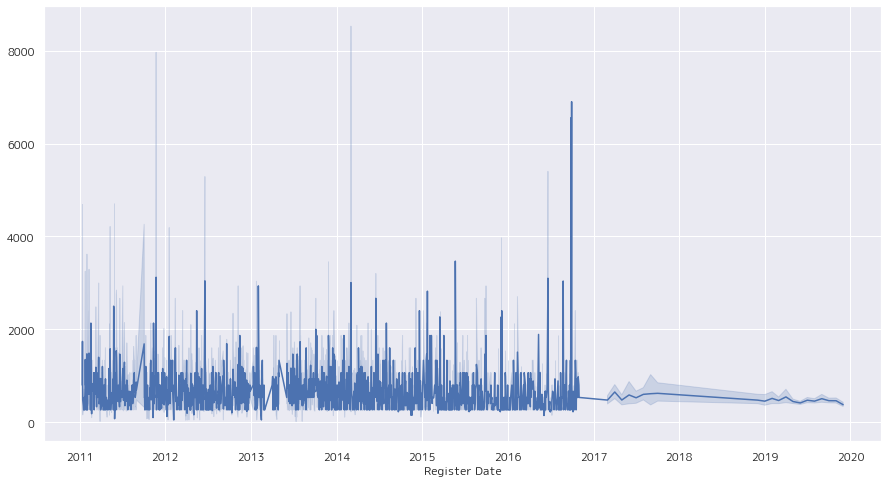

In [32]:
plt.figure(figsize=(15,8))
values = em_series.values
# plot dataset
sns.lineplot(data=em_series)

In [36]:
def series_to_supervised(data, n_in=4, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = pd.concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]
 
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = np.asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(np.asarray([testX]))
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	rmse = mean_squared_error(test[:, -1], predictions,squared=False)
	mape = mean_absolute_percentage_error(test[:, -1], predictions)
	return rmse, mape,test[:, -1], predictions

In [37]:
em_series.describe()

count     5460.000000
mean       612.174736
std        595.530958
min         15.110000
25%        266.770000
50%        533.540000
75%        800.310000
max      13135.000000
dtype: float64

In [ ]:
values = np.expand_dims(em_series.values,axis=1)
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
rmse, mape, y, yhat = walk_forward_validation(data, 12)
print('RMSE: %.3f' % rmse)
print('MAPE: %.3f' % mape)
# plot expected vs preducted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

In [ ]:
data.shape

In [38]:
names = ["Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest","LGBM","XGBoost"]
models = [
    GradientBoostingRegressor(),
    DecisionTreeRegressor(max_depth=5),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    LGBMRegressor(),
    XGBRegressor()]

In [39]:
# values = pd.DataFrame(em_series.values)
# dataframe = pd.concat([values.shift(1), values], axis=1)
# dataframe.columns = ['t-1', 't']
# dataframe.dropna(inplace= True)
# target = dataframe.iloc[:,1]
# data = dataframe.iloc[:,:-1]
dataset = series_to_supervised(np.expand_dims(em_series.values,axis=1), n_in=1)
data  = dataset[:,:-1]
target = dataset[:,-1]

In [42]:
# split into train and test sets
train_X,test_X, train_y,test_y  = train_test_split(data, target, test_size = 0.1)
# model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
# model = XGBRegressor()
model = LGBMRegressor()
model.fit(train_X, train_y)
yhat = model.predict(test_X)
rmse = mean_squared_error(test_y, yhat,squared=False)
mape = mean_absolute_percentage_error(test_y, yhat)
print('Test RMSE: %.3f' % rmse)
print('Test MAPE: %.3f' % mape)

Test RMSE: 715.325
Test MAPE: 0.791


In [43]:
rmse = []
mape = []
r_squared = []
for  model in models:
    model.fit(train_X, train_y)
    y_pred  = model.predict(test_X)
#     print(y_pred)
    rmse_score = mean_squared_error(test_y, y_pred,squared=False)
    mape_score = np.mean(np.abs((test_y - y_pred)/test_y)*100)
    r_squared_score  = model.score(test_X,test_y)
    r_squared.append(r_squared_score)
    rmse.append(rmse_score)
    mape.append(mape_score)

In [44]:
df_score = pd.DataFrame()
df_score['MODELS'] = names
df_score['R_SQUARED'] = r_squared
df_score['RMSE'] = rmse
df_score['MAPE'] = mape
df_score['RMSE'] = round(df_score['RMSE'],3)
df_score['MAPE'] = round(df_score['MAPE'],3)
df_score['R_SQUARED'] = round(df_score['R_SQUARED'],3)

df_score

,MODELS,R_SQUARED,RMSE,MAPE
0,Gradient_Boosting,0.003,717.489,78.689
1,Decision_Tree,0.010,714.975,78.647
2,Extra_Trees,-0.006,720.557,78.881
3,Random_Forest,-0.005,720.288,78.978
4,LGBM,0.009,715.325,79.127
5,XGBoost,-0.008,721.224,78.884


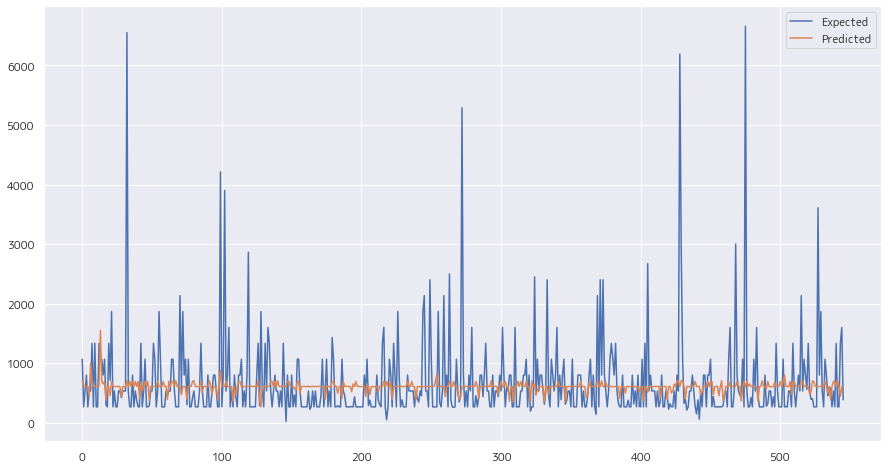

In [45]:
plt.figure(figsize=(15,8))
plt.plot(test_y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

In [522]:
from statsmodels.tsa.arima.model import ARIMA

X = em_series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=352.469613, expected=480.000000
predicted=392.634502, expected=480.000000
predicted=427.946939, expected=533.540000
predicted=428.363301, expected=266.770000
predicted=385.060146, expected=800.310000
predicted=477.877790, expected=266.770000
predicted=474.202302, expected=266.770000
predicted=428.021379, expected=480.000000
predicted=428.537948, expected=480.000000
predicted=434.312670, expected=266.770000
predicted=416.891631, expected=800.310000
predicted=433.817075, expected=1067.080000
predicted=583.314052, expected=1067.080000
predicted=716.509119, expected=533.540000
predicted=710.512403, expected=266.770000
predicted=661.919828, expected=533.540000
predicted=694.524109, expected=800.310000
predicted=703.522985, expected=266.770000
predicted=567.226975, expected=2400.930000
predicted=827.679199, expected=266.770000
predicted=794.546189, expected=533.540000
predicted=789.659598, expected=533.540000
predicted=779.733108, expected=1333.850000
predicted=909.389563, expected

predicted=1031.643530, expected=266.770000
predicted=366.148071, expected=266.770000
predicted=352.339418, expected=533.540000
predicted=403.003237, expected=266.770000
predicted=404.885642, expected=266.770000
predicted=384.474490, expected=1067.080000
predicted=457.413148, expected=266.770000
predicted=459.970536, expected=266.770000
predicted=432.787922, expected=533.540000
predicted=446.494397, expected=533.540000
predicted=497.973682, expected=266.770000
predicted=471.820509, expected=533.540000
predicted=402.216746, expected=533.540000
predicted=453.159864, expected=266.770000
predicted=440.947042, expected=266.770000
predicted=390.752614, expected=266.770000
predicted=354.515543, expected=266.770000
predicted=348.444109, expected=800.310000
predicted=402.319560, expected=392.290000
predicted=389.082969, expected=533.540000
predicted=424.829225, expected=1067.080000
predicted=570.763469, expected=266.770000
predicted=567.389129, expected=266.770000
predicted=534.908349, expected=

predicted=364.005822, expected=332.200000
predicted=373.262326, expected=437.580000
predicted=402.526801, expected=266.770000
predicted=395.796205, expected=385.050000
predicted=372.599170, expected=356.360000
predicted=365.960485, expected=951.000000
predicted=465.517038, expected=1067.080000
predicted=597.804599, expected=533.540000
predicted=607.036674, expected=422.490000
predicted=614.999900, expected=422.490000
predicted=623.494389, expected=385.050000
predicted=617.146118, expected=1067.080000
predicted=644.761047, expected=266.770000
predicted=522.915451, expected=266.770000
predicted=462.036619, expected=513.710000
predicted=483.607090, expected=513.710000
predicted=508.602724, expected=513.710000
predicted=511.653744, expected=385.050000
predicted=413.402381, expected=392.600000
predicted=432.406998, expected=422.800000
predicted=454.153890, expected=513.710000
predicted=456.782050, expected=1067.080000
predicted=559.501669, expected=385.050000
predicted=538.832039, expected=

predicted=319.830166, expected=533.540000
predicted=362.291650, expected=1867.390000
predicted=614.081186, expected=533.540000
predicted=652.451823, expected=266.770000
predicted=615.992083, expected=533.540000
predicted=661.598994, expected=800.310000
predicted=763.168648, expected=266.770000
predicted=683.730856, expected=266.770000
predicted=434.222309, expected=533.540000
predicted=446.377286, expected=533.540000
predicted=492.167889, expected=266.770000
predicted=435.613186, expected=266.770000
predicted=352.880703, expected=533.540000
predicted=403.196071, expected=800.310000
predicted=495.919754, expected=266.770000
predicted=446.056841, expected=385.050000
predicted=417.305215, expected=1600.620000
predicted=662.107412, expected=385.050000
predicted=679.855787, expected=385.050000
predicted=621.031122, expected=385.050000
predicted=565.243622, expected=385.050000
predicted=588.755625, expected=467.830000
predicted=575.345868, expected=533.540000
predicted=427.211736, expected=2

predicted=502.415091, expected=407.800000
predicted=495.625330, expected=392.690000
predicted=488.035399, expected=266.770000
predicted=436.308971, expected=392.690000
predicted=332.234600, expected=392.690000
predicted=355.383841, expected=392.690000
predicted=374.828689, expected=513.520000
predicted=393.613619, expected=513.520000
predicted=416.472819, expected=346.480000
predicted=425.480982, expected=354.810000
predicted=416.424627, expected=266.770000
predicted=395.183709, expected=348.680000
predicted=387.398805, expected=422.800000
predicted=375.034491, expected=533.540000
predicted=382.659932, expected=392.600000
predicted=389.060757, expected=533.540000
predicted=418.607058, expected=469.570000
predicted=452.445831, expected=469.570000
predicted=470.780228, expected=469.570000
predicted=477.085095, expected=1600.620000
predicted=671.095463, expected=266.770000
predicted=645.955484, expected=533.540000
predicted=626.548014, expected=266.770000
predicted=593.745469, expected=53

predicted=365.610138, expected=294.440000
predicted=344.508336, expected=451.970000
predicted=346.398128, expected=391.810000
predicted=326.795983, expected=317.100000
predicted=332.392117, expected=800.310000
predicted=425.677208, expected=1067.080000
predicted=568.733308, expected=266.770000
predicted=553.455252, expected=1067.080000
predicted=652.082590, expected=266.770000
predicted=634.650164, expected=533.540000
predicted=658.034915, expected=800.310000
predicted=663.111700, expected=2934.470000
predicted=1014.192110, expected=266.770000
predicted=998.972473, expected=533.540000
predicted=872.488710, expected=533.540000
predicted=922.396336, expected=800.310000
predicted=974.820226, expected=533.540000
predicted=913.723391, expected=533.540000
predicted=534.631224, expected=266.770000
predicted=529.001721, expected=266.770000
predicted=481.898776, expected=241.600000
predicted=432.528449, expected=241.600000
predicted=343.216845, expected=241.600000
predicted=295.405002, expected

predicted=1162.705668, expected=266.770000
predicted=694.935740, expected=533.540000
predicted=665.033771, expected=533.540000
predicted=695.845466, expected=266.770000
predicted=398.705701, expected=800.310000
predicted=448.547672, expected=467.910000
predicted=484.875056, expected=266.770000
predicted=474.035999, expected=266.770000
predicted=426.964352, expected=467.730000
predicted=423.063786, expected=467.730000
predicted=454.304319, expected=533.540000
predicted=413.955680, expected=452.640000
predicted=412.546469, expected=347.300000
predicted=422.966796, expected=452.640000
predicted=451.795401, expected=452.640000
predicted=451.269248, expected=452.640000
predicted=448.128742, expected=452.640000
predicted=435.311822, expected=266.770000
predicted=403.038440, expected=800.310000
predicted=481.768237, expected=800.310000
predicted=546.768532, expected=452.640000
predicted=540.625924, expected=347.300000
predicted=515.646318, expected=347.300000
predicted=499.702692, expected=34

predicted=402.708995, expected=379.000000
predicted=393.466723, expected=266.770000
predicted=364.261379, expected=533.540000
predicted=368.538474, expected=430.350000
predicted=378.784032, expected=452.380000
predicted=391.081815, expected=452.380000
predicted=420.293883, expected=452.380000
predicted=433.553540, expected=452.380000
predicted=461.249412, expected=266.770000
predicted=415.776296, expected=266.770000
predicted=386.283977, expected=2184.940000
predicted=698.951779, expected=266.770000
predicted=665.440046, expected=533.540000
predicted=657.902805, expected=266.770000
predicted=626.150631, expected=266.770000
predicted=625.036687, expected=2645.550000
predicted=1028.398802, expected=452.850000
predicted=765.079424, expected=800.310000
predicted=825.593893, expected=453.140000
predicted=810.779383, expected=453.140000
predicted=845.787896, expected=266.770000
predicted=812.698842, expected=379.000000
predicted=464.391402, expected=2672.800000
predicted=857.558772, expected

predicted=384.293962, expected=266.770000
predicted=380.004711, expected=266.770000
predicted=349.262409, expected=266.770000
predicted=321.618778, expected=266.770000
predicted=293.079333, expected=266.770000
predicted=266.770000, expected=266.770000
predicted=266.770000, expected=266.770000
predicted=266.770000, expected=266.770000
predicted=266.770000, expected=533.540000
predicted=314.377004, expected=266.770000
predicted=313.921287, expected=467.040000
predicted=346.593535, expected=467.040000
predicted=380.775301, expected=467.040000
predicted=415.262660, expected=467.040000
predicted=443.986316, expected=467.040000
predicted=436.413600, expected=1867.390000
predicted=716.984594, expected=266.770000
predicted=679.007775, expected=1067.080000
predicted=769.935056, expected=451.800000
predicted=762.728137, expected=533.540000
predicted=775.619842, expected=266.770000
predicted=718.151595, expected=533.540000
predicted=520.773166, expected=302.000000
predicted=516.261663, expected=2

predicted=509.072700, expected=438.050000
predicted=452.628022, expected=438.050000
predicted=438.050000, expected=800.310000
predicted=503.999624, expected=302.000000
predicted=477.466511, expected=302.000000
predicted=448.683989, expected=422.800000
predicted=446.552585, expected=422.800000
predicted=448.167954, expected=422.800000
predicted=441.308566, expected=422.800000
predicted=384.477331, expected=422.800000
predicted=404.357469, expected=266.770000
predicted=394.396815, expected=302.260000
predicted=373.217881, expected=421.810000
predicted=375.641402, expected=302.000000
predicted=355.974453, expected=421.810000
predicted=356.175267, expected=421.810000
predicted=358.786566, expected=347.300000
predicted=370.903521, expected=375.000000
predicted=380.373996, expected=375.000000
predicted=374.466283, expected=375.000000
predicted=385.436646, expected=375.000000
predicted=377.588572, expected=266.770000
predicted=351.068707, expected=317.100000
predicted=345.288381, expected=317

NameError: name 'sqrt' is not defined

In [523]:
mean_squared_error(test, predictions)

244912.69871283247

In [524]:
mean_absolute_percentage_error(test, predictions)

0.5400992112886606

In [534]:
df_3s[df_3s.total_price_3s > 0]

,index,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,...,Gross Weight in KG,Net Weight in KG,Cargo Value USD,extracted_engine,brand,month_year,year,len_em,count_em,total_price_3s
7,20,2011-01-25,8407343009,"ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: SUBARU...","SUBARU, NISSAN, TOYOTA, HONDA","SUBARU, NISSAN, TOYOTA, HONDA",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","G.E. TRADING CO., LTD",...,3250.0,3250.0,3250.00,[3S],TOYOTA,2011-01,01,1,1,3250.00
13,39,2011-01-13,8407343009,ДВИГАТЕЛЬ А/М Б/У БЕНЗИН С ОБЪЕМОМ БОЛЕЕ 1000С...,"TOYOTA,NISSAN,MMC,SUBARU,MAZDA,HONDA","TOYOTA,NISSAN,MMC,SUBARU,MAZDA,HONDA",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",ДОМИТОРИ ШОКАЙ ИНК,...,5029.0,5029.0,3287.37,"[3S, 2TZ, 1JZ]",TOYOTA,2011-01,01,3,1,266.77
16,44,2011-01-13,8407343009,ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЕНЗИНОВЫЕ БЫВШ...,TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","SUZAN TRADING CO., LTD",...,6620.0,6620.0,4950.00,"[5E, 4E, 3S, 5A, 4S]",TOYOTA,2011-01,01,5,1,266.77
17,45,2011-01-13,8407343009,"ДВИГАТЕЛЬ БЕНЗИН.ДЛЯ ЛЕГ.А/М,Б/У,ЯП.ПР-ВА В СБ...","NISSAN, MITSUBISHI,TOYOTA,MAZDA,HONDA,SUBARU,D...","NISSAN, MITSUBISHI, TOYOTA,MAZDA,SUBARU,HONDA,...",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",LEEA CORPORATION,...,10255.0,10255.0,6160.00,[3S],TOYOTA,2011-01,01,1,1,6160.00
19,56,2011-01-14,8407343009,"ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ ЛЕГ.А/М,Б/У,ЯП.ПР-ВА:...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",JAPROS CO LTD,...,150.0,150.0,160.00,[3S],TOYOTA,2011-01,01,1,1,160.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20821,258378,2019-12-01,8407343009,ДВИГАТЕЛИ БЕНЗИНОВЫЕ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫ...,TOYOTA MOTOR CO. LTD,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","KR, KOR, Korea",KOS.COM CORPORATION,...,205.0,205.0,309.55,[3S],TOYOTA,2019-12,12,1,1,309.55
20839,258396,2019-12-01,8407343009,"ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",ROOTS CO. LTD,...,300.0,300.0,451.94,[3S],TOYOTA,2019-12,12,1,1,451.94
20840,258397,2019-12-01,8407343009,"ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",ROOTS CO. LTD,...,300.0,300.0,451.94,[3S],TOYOTA,2019-12,12,1,1,451.94
20870,258899,2019-12-01,8407343009,ДВИГАТЕЛЬ БЕНЗИНОВЫЙ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫ...,TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",D-JAPAN CO. LTD,...,200.0,200.0,302.00,[3S],TOYOTA,2019-12,12,1,1,302.00


<AxesSubplot:xlabel='Register Date'>

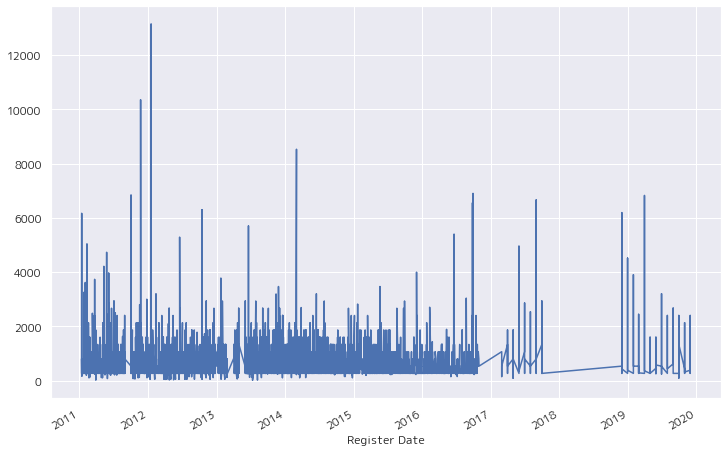

In [44]:
plt.figure(figsize=(12,8))
em_series.plot()

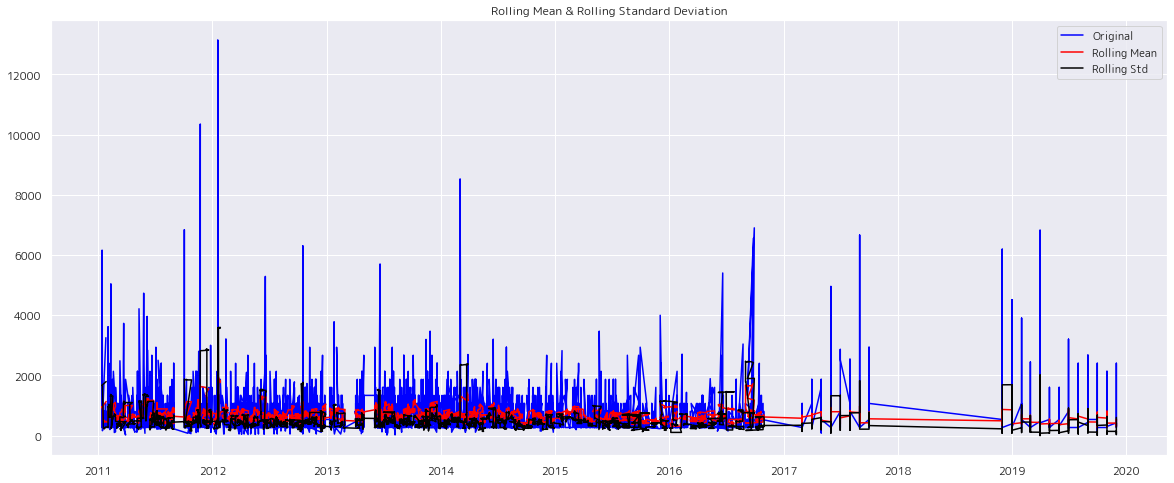

In [46]:
plt.figure(figsize=(20,8))
df_times = em_series.to_frame(name='total')
rolling_mean = df_times.rolling(window = 12).mean()
rolling_std = df_times.rolling(window = 12).std()
plt.plot(df_times, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [581]:
df_times

In [46]:
result = adfuller(df_times['total'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -10.872344071922543
p-value: 1.358450062266307e-19
Critical Values:
	1%: -3.431553973455812
	5%: -2.862072035429552
	10%: -2.567053201496216


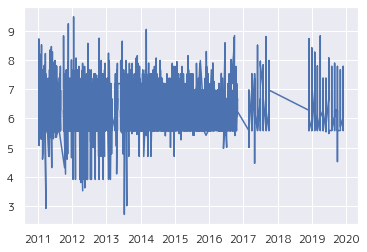

In [47]:
df_log = np.log(df_times)
plt.plot(df_log)

In [565]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['total'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

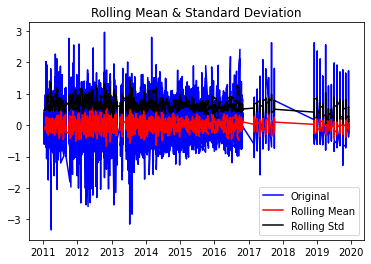

ADF Statistic: -19.555892557265317
p-value: 0.0
Critical Values:
	1%: -3.4315581999292024
	5%: -2.862073902727173
	10%: -2.567054195520633


In [566]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

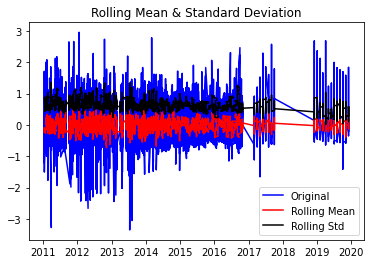

ADF Statistic: -16.70872138898293
p-value: 1.4406476848857865e-29
Critical Values:
	1%: -3.4315557494141706
	5%: -2.8620728200657903
	10%: -2.5670536191840383


In [567]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

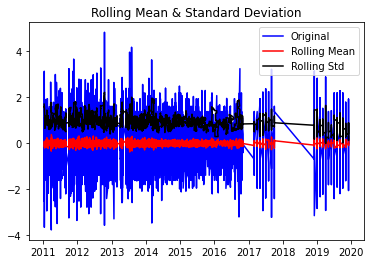

ADF Statistic: -20.828070261216013
p-value: 0.0
Critical Values:
	1%: -3.4315559717774264
	5%: -2.862072918308077
	10%: -2.5670536714816623


In [568]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A dat

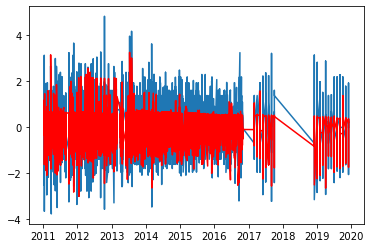

In [587]:
decomposition = seasonal_decompose(df_log,model='additive', extrapolate_trend='freq', period=int(len(df_log)/2)) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

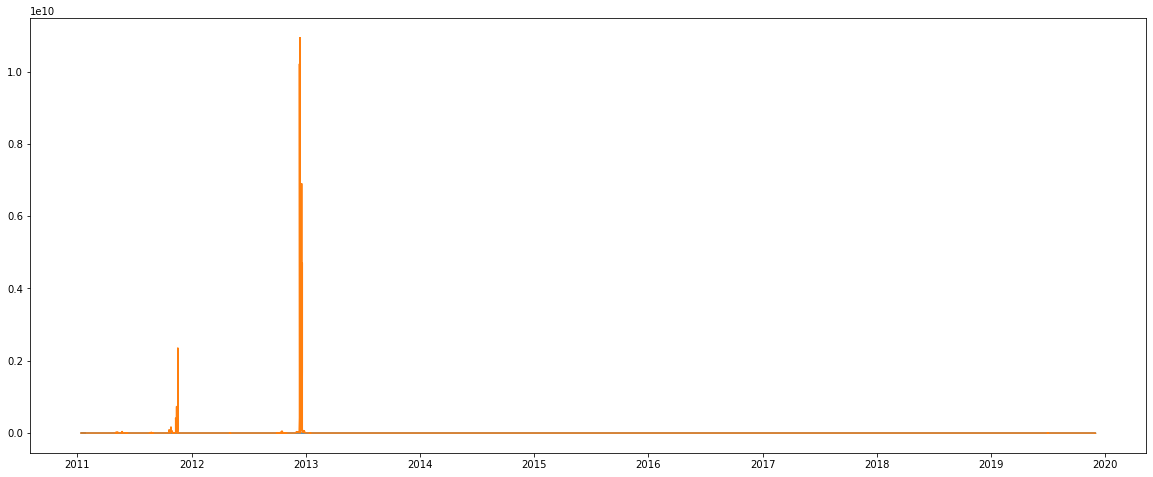

In [592]:
plt.figure(figsize=(20,8))
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['total'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df_times)
plt.plot(predictions_ARIMA)

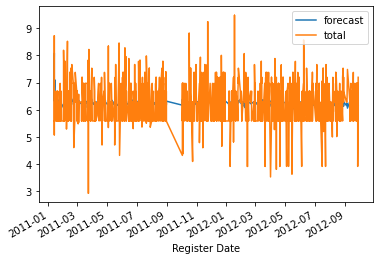

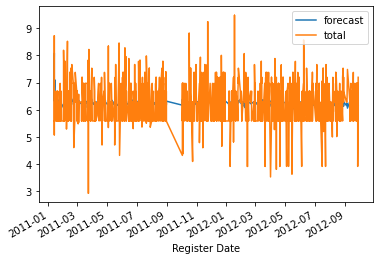

In [597]:
results.plot_predict(1,1200)

Register Date
2011-01-31    21574.65
2011-02-28    49737.56
2011-03-31    39449.21
2011-04-30    19106.56
2011-05-31    32328.29
Freq: M, dtype: float64


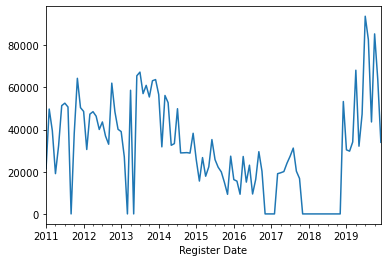

In [618]:
resample = em_series.resample('M')
quarterly_mean_sales = resample.sum()
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
plt.show()

In [624]:
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return pd.Series(diff)

X = em_series.values
# difference data
stationary = difference(X)
stationary.index = em_series.index[1:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))


ADF Statistic: -20.960792
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


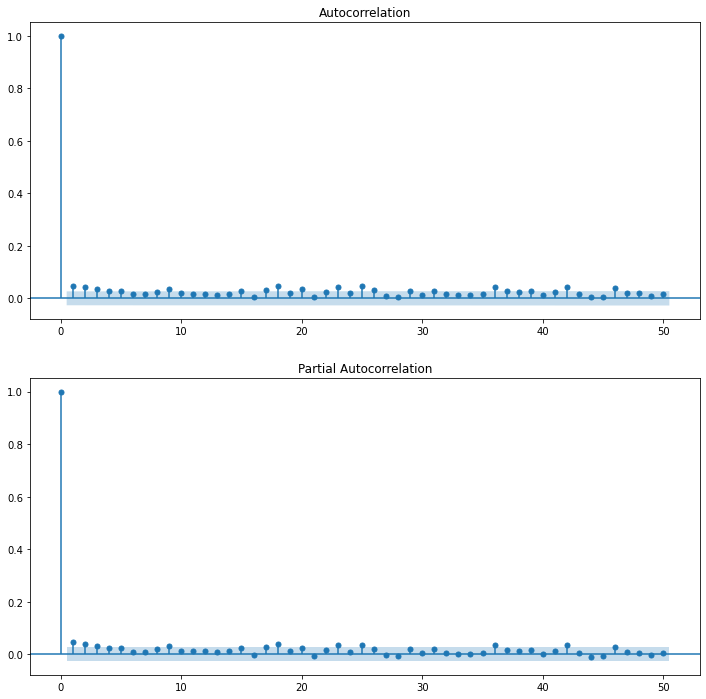

In [627]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12,12))
plt.subplot(211)
plot_acf(em_series, lags=50, ax=plt.gca())
plt.subplot(212)
plot_pacf(em_series, lags=50, ax=plt.gca())
plt.show()


In [ ]:
train_size = int(len(X) * 0.70)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = mean_squared_error(test, predictions,squared=False)
mape = mean_absolute_percentage_error(test, predictions)
print('RMSE: %.3f' % rmse)
print('MAPE: %.3f' % mape)

In [637]:
X = df_log.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(3,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = mean_squared_error(np.exp(test), np.exp(predictions),squared=False)
mape = mean_absolute_percentage_error(np.exp(test), np.exp(predictions))
print('RMSE: %.3f' % rmse)
print('MAPE: %.3f' % mape)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

predicted=6.064050, expected=5.586387
predicted=5.929637, expected=6.279534
predicted=5.787262, expected=5.586387
predicted=5.752193, expected=5.586387
predicted=5.738566, expected=6.972681
predicted=6.160913, expected=5.586387
predicted=5.918860, expected=7.959052
predicted=6.580324, expected=5.586387
predicted=6.504471, expected=5.586387
predicted=6.110201, expected=5.586387
predicted=6.174777, expected=6.279534
predicted=5.786571, expected=5.586387
predicted=5.752988, expected=6.684999
predicted=6.056848, expected=6.972681
predicted=6.425311, expected=5.586387
predicted=6.163098, expected=5.586387
predicted=6.164580, expected=5.586387
predicted=5.929684, expected=5.586387
predicted=5.585532, expected=5.586387
predicted=5.585532, expected=5.586387
predicted=5.585533, expected=5.586387
predicted=5.585533, expected=5.586387
predicted=5.585533, expected=6.972681
predicted=5.988104, expected=5.586387
predicted=5.920432, expected=6.684999
predicted=6.209969, expected=5.586387
predicted=6.

predicted=5.802477, expected=5.586387
predicted=5.699389, expected=6.046805
predicted=5.719340, expected=6.279534
predicted=5.897531, expected=5.932245
predicted=5.955333, expected=6.279534
predicted=6.138386, expected=5.586387
predicted=6.000252, expected=6.279534
predicted=6.027003, expected=6.322296
predicted=6.136777, expected=6.240938
predicted=6.107274, expected=6.240938
predicted=6.268228, expected=6.279534
predicted=6.271816, expected=5.586387
predicted=6.059674, expected=6.279534
predicted=6.103145, expected=5.586387
predicted=5.923107, expected=6.083109
predicted=5.884599, expected=6.083109
predicted=6.020130, expected=6.083109
predicted=5.960155, expected=5.586387
predicted=5.938400, expected=6.149408
predicted=5.982491, expected=6.149408
predicted=6.006892, expected=5.586387
predicted=5.846664, expected=5.586387
predicted=5.850242, expected=6.011267
predicted=5.847857, expected=6.011267
predicted=5.811026, expected=5.973530
predicted=5.894970, expected=5.973530
predicted=5.

predicted=5.941734, expected=5.586387
predicted=5.923185, expected=6.064599
predicted=5.879577, expected=6.064599
predicted=6.009643, expected=5.586387
predicted=5.808003, expected=5.970777
predicted=5.922310, expected=5.953373
predicted=5.901886, expected=5.586387
predicted=5.760233, expected=6.064599
predicted=5.901178, expected=5.586387
predicted=5.791021, expected=6.146415
predicted=5.854869, expected=6.146415
predicted=5.999710, expected=5.970777
predicted=5.957058, expected=5.759217
predicted=5.992114, expected=6.480167
predicted=6.109808, expected=5.953373
predicted=6.039853, expected=7.378146
predicted=6.434306, expected=5.586387
predicted=6.320012, expected=5.934894
predicted=6.179903, expected=5.970777
predicted=6.223025, expected=6.117414
predicted=5.909461, expected=5.586387
predicted=5.885879, expected=5.586387
predicted=5.800078, expected=5.659099
predicted=5.737844, expected=5.710427
predicted=5.638881, expected=6.352263
predicted=5.852562, expected=6.119220
predicted=5.

predicted=5.934818, expected=5.517774
predicted=5.761833, expected=5.586387
predicted=5.569211, expected=5.487283
predicted=5.541685, expected=6.279534
predicted=5.745088, expected=5.586387
predicted=5.729944, expected=5.892749
predicted=5.804985, expected=6.684999
predicted=6.147907, expected=6.116664
predicted=6.071338, expected=6.279534
predicted=6.235410, expected=6.279534
predicted=6.342899, expected=6.279534
predicted=6.238930, expected=5.586387
predicted=6.079043, expected=5.892749
predicted=6.001034, expected=5.892749
predicted=5.919115, expected=5.605067
predicted=5.733399, expected=5.892749
predicted=5.823114, expected=5.892749
predicted=5.827661, expected=6.684999
predicted=6.049924, expected=6.279534
predicted=6.194244, expected=6.279534
predicted=6.274535, expected=5.586387
predicted=6.179198, expected=6.279534
predicted=6.112690, expected=5.710427
predicted=5.959487, expected=5.586387
predicted=5.770868, expected=6.279534
predicted=5.985033, expected=6.279534
predicted=5.

predicted=5.783784, expected=6.279534
predicted=5.910612, expected=5.586387
predicted=5.816212, expected=5.586387
predicted=5.742717, expected=5.586387
predicted=5.757009, expected=5.586387
predicted=5.585719, expected=5.586387
predicted=5.585719, expected=6.279534
predicted=5.785678, expected=6.972681
predicted=6.151256, expected=6.010973
predicted=6.195660, expected=6.010973
predicted=6.294612, expected=6.010973
predicted=6.248136, expected=6.010973
predicted=6.010516, expected=6.010973
predicted=6.010516, expected=5.710857
predicted=5.923843, expected=5.586387
predicted=5.816354, expected=6.279534
predicted=5.918951, expected=5.586387
predicted=5.781682, expected=6.279534
predicted=5.942711, expected=6.279534
predicted=6.122270, expected=5.586387
predicted=5.907981, expected=5.586387
predicted=5.913884, expected=6.279534
predicted=5.957026, expected=6.684999
predicted=6.068067, expected=6.279534
predicted=6.204515, expected=5.586387
predicted=6.170778, expected=6.972681
predicted=6.

predicted=7.239819, expected=5.735120
predicted=6.808157, expected=5.735120
predicted=6.518353, expected=5.735120
predicted=6.138436, expected=5.735120
predicted=5.734551, expected=6.079842
predicted=5.833561, expected=6.079842
predicted=5.915244, expected=6.079842
predicted=5.994785, expected=6.079842
predicted=6.079438, expected=6.079842
predicted=6.079438, expected=6.079842
predicted=6.079438, expected=6.079842
predicted=6.079438, expected=6.279534
predicted=6.136801, expected=6.279534
predicted=6.184118, expected=6.080940
predicted=6.173140, expected=6.080940
predicted=6.175123, expected=6.279534
predicted=6.186354, expected=5.586387
predicted=5.985541, expected=5.850189
predicted=5.942900, expected=5.850189
predicted=5.894227, expected=5.850189
predicted=5.784908, expected=5.850189
predicted=5.849677, expected=5.850189
predicted=5.849677, expected=5.586387
predicted=5.773895, expected=6.279534
predicted=5.910482, expected=5.586387
predicted=5.814810, expected=5.586387
predicted=5.

predicted=5.955693, expected=6.279534
predicted=6.104179, expected=5.586387
predicted=6.088397, expected=5.586387
predicted=5.743819, expected=5.586387
predicted=5.754929, expected=5.586387
predicted=5.585775, expected=5.586387
predicted=5.585775, expected=6.684999
predicted=5.906357, expected=5.586387
predicted=5.845825, expected=5.586387
predicted=5.836322, expected=6.684999
predicted=6.174162, expected=5.759217
predicted=5.896093, expected=5.759217
predicted=5.928088, expected=5.759217
predicted=5.984475, expected=5.759217
predicted=5.758685, expected=5.759217
predicted=5.758685, expected=5.759217
predicted=5.758685, expected=5.759217
predicted=5.758685, expected=5.586387
predicted=5.708294, expected=6.684999
predicted=5.987664, expected=6.279534
predicted=6.089928, expected=6.082333
predicted=6.145371, expected=6.082333
predicted=6.273950, expected=6.082333
predicted=6.130025, expected=6.082333
predicted=6.081948, expected=6.082333
predicted=6.081948, expected=6.082333
predicted=6.

NameError: name 'pyplot' is not defined

In [641]:
rmse = mean_squared_error(np.exp(test), np.exp(predictions),squared=False)
mape = mean_absolute_percentage_error(np.exp(test), np.exp(predictions))
print('RMSE: %.3f' % rmse)
print('MAPE: %.3f' % mape)

RMSE: 475.460
MAPE: 0.394


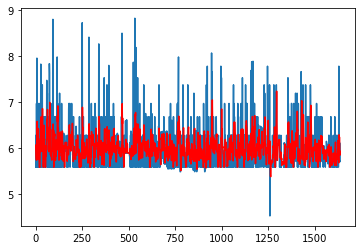

In [642]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

predicted=6.035373, expected=5.586387
predicted=5.983759, expected=6.279534
predicted=6.016647, expected=5.586387
predicted=5.723723, expected=5.586387
predicted=5.707003, expected=6.972681
predicted=6.057403, expected=5.586387
predicted=5.992831, expected=7.959052
predicted=6.405660, expected=5.586387
predicted=6.329392, expected=5.586387
predicted=6.264748, expected=5.586387
predicted=6.042947, expected=6.279534
predicted=6.203401, expected=5.586387
predicted=5.724526, expected=6.684999
predicted=5.973524, expected=6.972681
predicted=6.277071, expected=5.586387
predicted=6.186976, expected=5.586387
predicted=6.040529, expected=5.586387
predicted=6.060672, expected=5.586387
predicted=5.847185, expected=5.586387
predicted=5.585448, expected=5.586387
predicted=5.585448, expected=5.586387
predicted=5.585449, expected=5.586387
predicted=5.585449, expected=6.972681
predicted=5.923044, expected=5.586387
predicted=5.863601, expected=6.684999
predicted=6.095240, expected=5.586387
predicted=6.

predicted=5.793880, expected=6.279534
predicted=5.946125, expected=6.475895
predicted=6.073413, expected=6.046899
predicted=6.129802, expected=5.586387
predicted=5.964496, expected=5.586387
predicted=5.967756, expected=6.279534
predicted=6.013209, expected=6.279534
predicted=5.981902, expected=6.279534
predicted=6.014368, expected=6.279534
predicted=6.146208, expected=5.933571
predicted=6.194470, expected=5.586387
predicted=6.040306, expected=5.933994
predicted=5.995758, expected=6.279534
predicted=6.023623, expected=5.586387
predicted=5.851142, expected=6.116289
predicted=5.902042, expected=5.586387
predicted=5.889855, expected=5.586387
predicted=5.810811, expected=5.586387
predicted=5.686195, expected=5.586387
predicted=5.687132, expected=6.684999
predicted=5.854357, expected=5.586387
predicted=5.805105, expected=5.586387
predicted=5.776908, expected=5.586387
predicted=5.794252, expected=5.586387
predicted=5.796561, expected=6.279534
predicted=5.755057, expected=5.586387
predicted=5.

predicted=5.755020, expected=5.586387
predicted=5.762256, expected=6.046805
predicted=5.786307, expected=6.279534
predicted=5.844903, expected=5.932245
predicted=5.888056, expected=6.279534
predicted=6.032559, expected=5.586387
predicted=6.004464, expected=6.279534
predicted=6.075998, expected=6.322296
predicted=6.099854, expected=6.240938
predicted=6.146423, expected=6.240938
predicted=6.135964, expected=6.279534
predicted=6.272827, expected=5.586387
predicted=6.104912, expected=6.279534
predicted=6.127265, expected=5.586387
predicted=5.980810, expected=6.083109
predicted=5.962465, expected=6.083109
predicted=5.936215, expected=6.083109
predicted=6.026049, expected=5.586387
predicted=5.866230, expected=6.149408
predicted=6.000353, expected=6.149408
predicted=6.023933, expected=5.586387
predicted=5.892411, expected=5.586387
predicted=5.792339, expected=6.011267
predicted=5.904359, expected=6.011267
predicted=5.881253, expected=5.973530
predicted=5.838768, expected=5.973530
predicted=5.

predicted=5.876619, expected=5.586387
predicted=5.854683, expected=6.064599
predicted=5.958215, expected=6.064599
predicted=5.927563, expected=5.586387
predicted=5.898972, expected=5.970777
predicted=5.855012, expected=5.953373
predicted=5.933290, expected=5.586387
predicted=5.818854, expected=6.064599
predicted=5.839819, expected=5.586387
predicted=5.824054, expected=6.146415
predicted=5.876724, expected=6.146415
predicted=5.922235, expected=5.970777
predicted=5.981003, expected=5.759217
predicted=5.910102, expected=6.480167
predicted=6.118555, expected=5.953373
predicted=6.062522, expected=7.378146
predicted=6.356234, expected=5.586387
predicted=6.209569, expected=5.934894
predicted=6.232029, expected=5.970777
predicted=6.160128, expected=6.117414
predicted=6.197076, expected=5.586387
predicted=5.825903, expected=5.586387
predicted=5.821049, expected=5.659099
predicted=5.778656, expected=5.710427
predicted=5.732042, expected=6.352263
predicted=5.807316, expected=6.119220
predicted=5.

predicted=5.848442, expected=5.517774
predicted=5.854178, expected=5.586387
predicted=5.724466, expected=5.487283
predicted=5.549510, expected=6.279534
predicted=5.720025, expected=5.586387
predicted=5.691811, expected=5.892749
predicted=5.763812, expected=6.684999
predicted=6.024668, expected=6.116664
predicted=6.118509, expected=6.279534
predicted=6.111903, expected=6.279534
predicted=6.253382, expected=6.279534
predicted=6.325991, expected=5.586387
predicted=6.080716, expected=5.892749
predicted=6.048853, expected=5.892749
predicted=5.985927, expected=5.605067
predicted=5.838438, expected=5.892749
predicted=5.776435, expected=5.892749
predicted=5.840900, expected=6.684999
predicted=6.028288, expected=6.279534
predicted=6.086935, expected=6.279534
predicted=6.203139, expected=5.586387
predicted=6.115172, expected=6.279534
predicted=6.219985, expected=5.710427
predicted=6.018526, expected=5.586387
predicted=5.866620, expected=6.279534
predicted=5.907577, expected=6.279534
predicted=6.

predicted=5.875715, expected=6.279534
predicted=5.909451, expected=5.586387
predicted=5.822347, expected=5.586387
predicted=5.761420, expected=5.586387
predicted=5.718562, expected=5.586387
predicted=5.717810, expected=5.586387
predicted=5.585652, expected=6.279534
predicted=5.752922, expected=6.972681
predicted=6.056376, expected=6.010973
predicted=6.085123, expected=6.010973
predicted=6.155042, expected=6.010973
predicted=6.246012, expected=6.010973
predicted=6.193806, expected=6.010973
predicted=6.010490, expected=5.710857
predicted=5.937960, expected=5.586387
predicted=5.849088, expected=6.279534
predicted=5.937953, expected=5.586387
predicted=5.826173, expected=6.279534
predicted=5.902195, expected=6.279534
predicted=6.021674, expected=5.586387
predicted=5.979063, expected=5.586387
predicted=5.843897, expected=6.279534
predicted=6.018005, expected=6.684999
predicted=6.118869, expected=6.279534
predicted=6.093525, expected=5.586387
predicted=6.052822, expected=6.972681
predicted=6.

predicted=7.058247, expected=5.735120
predicted=6.873321, expected=5.735120
predicted=6.589994, expected=5.735120
predicted=6.362215, expected=5.735120
predicted=6.048598, expected=6.079842
predicted=5.817304, expected=6.079842
predicted=5.883995, expected=6.079842
predicted=5.947915, expected=6.079842
predicted=6.013522, expected=6.079842
predicted=6.079418, expected=6.079842
predicted=6.079418, expected=6.079842
predicted=6.079418, expected=6.279534
predicted=6.127397, expected=6.279534
predicted=6.166031, expected=6.080940
predicted=6.155336, expected=6.080940
predicted=6.154919, expected=6.279534
predicted=6.203988, expected=5.586387
predicted=6.038083, expected=5.850189
predicted=5.966225, expected=5.850189
predicted=5.926514, expected=5.850189
predicted=5.881491, expected=5.850189
predicted=5.799227, expected=5.850189
predicted=5.849637, expected=5.586387
predicted=5.786246, expected=6.279534
predicted=5.901744, expected=5.586387
predicted=5.820447, expected=5.586387
predicted=5.

predicted=6.023364, expected=5.586387
predicted=5.919713, expected=6.279534
predicted=6.042757, expected=5.586387
predicted=5.981688, expected=5.586387
predicted=5.975199, expected=5.586387
predicted=5.716360, expected=5.586387
predicted=5.716841, expected=5.586387
predicted=5.585714, expected=6.684999
predicted=5.855532, expected=5.586387
predicted=5.799037, expected=5.586387
predicted=5.787030, expected=6.684999
predicted=6.062332, expected=5.759217
predicted=6.049128, expected=5.759217
predicted=5.863502, expected=5.759217
predicted=5.900361, expected=5.759217
predicted=5.933722, expected=5.759217
predicted=5.758639, expected=5.759217
predicted=5.758639, expected=5.759217
predicted=5.758639, expected=5.586387
predicted=5.716225, expected=6.684999
predicted=5.952250, expected=6.279534
predicted=6.034172, expected=6.082333
predicted=6.076403, expected=6.082333
predicted=6.137905, expected=6.082333
predicted=6.233009, expected=6.082333
predicted=6.119207, expected=6.082333
predicted=6.

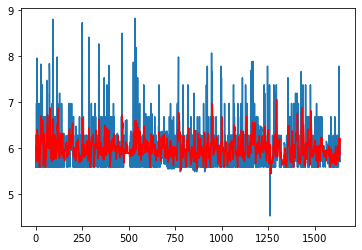

In [645]:
X = df_log.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(4,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = mean_squared_error(np.exp(test), np.exp(predictions),squared=False)
mape = mean_absolute_percentage_error(np.exp(test), np.exp(predictions))
print('RMSE: %.3f' % rmse)
print('MAPE: %.3f' % mape)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [1]:
X = df_log.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = mean_squared_error(np.exp(test), np.exp(predictions),squared=False)
mape = mean_absolute_percentage_error(np.exp(test), np.exp(predictions))
print('RMSE: %.3f' % rmse)
print('MAPE: %.3f' % mape)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

NameError: name 'df_log' is not defined

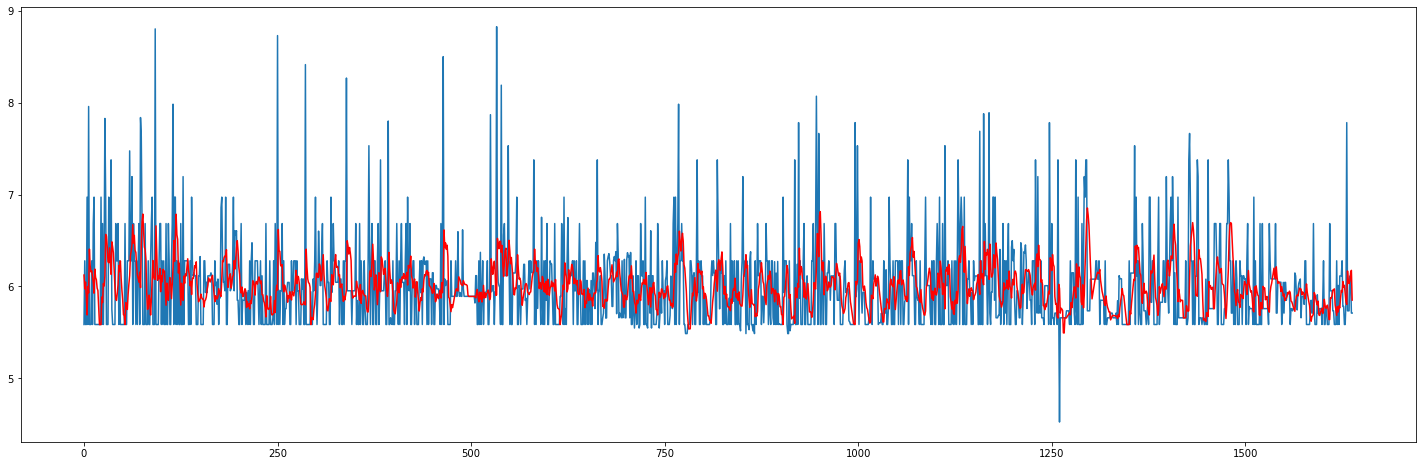

In [653]:
plt.figure(figsize=(25,8))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [48]:
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    mape = mean_absolute_percentage_error(test, predictions)
    return mape

def evaluate_models(dataset, p_values, d_values, q_values):
 dataset = dataset.astype('float32')
 best_score, best_cfg = float("inf"), None
 for p in p_values:
  for d in d_values:
    for q in q_values:
      order = (p,d,q)
      try:
       mape = evaluate_arima_model(dataset, order)
       if mape < best_score:
          best_score, best_cfg = mape, order
       print('ARIMA%s MAPE=%.3f' % (order,mape))
      except:
          continue
 print('Best ARIMA%s MAPE=%.3f' % (best_cfg, best_score))

In [ ]:
p_values = range(0,13)
d_values = range(0, 4)
q_values = range(0, 13)
warnings.filterwarnings("ignore")
evaluate_models(em_series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MAPE=0.825
ARIMA(0, 0, 1) MAPE=0.812
ARIMA(0, 0, 2) MAPE=0.801
ARIMA(0, 0, 3) MAPE=0.795
